# Disciplina Tópicos Especiais II (C318)

###### Alunos: Ana Paula S de Góis, Gabriella Gonçalves Moreira, Pietro de Souza Cardoso, Eduardo de Souza Bazilio e Marcelo Henrique Souza Abrantes
###### Professor: Ricardo Augusto

#### Projeto ML (Machine Learning) - Análise e Modelagem - Dataframe: Playlist de músicas de 2000 à 2023 


##### Objetivo: Prever se uma musica nova de um novo genero pode fazer sucesso

##### Regras de Negócio:

- Analisar a popularidade dos artistas nos últimos 10 anos, e a relação música e genero. 

- Quais são os generos mais consumidos?

- Tentar prever a popularidade de uma música baseado nas configurações da música. 

##### Tipo de problema: 

##### Enquadramento:


In [73]:

!pip install klib
!pip install smote
!pip install streamlit
!pip install plotly==5.22.0
!pip install feature-engine
!pip install catboost


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB 640.0 kB/s eta 0:02:38
   ---------------------------------------- 0.1/101.1 MB 777.7 kB/s eta 0:02:10
   ---------------------------------------- 0.3/101.1 MB 2.2 MB/s eta 0:00:46
   ---------------------------------------- 0.6/101.1 MB 3.5 MB/s eta 0:00:30
   ---------------------------------------- 0.6/101.1 MB 3.5 MB/s eta 0:00:30
   ---------------------------------------- 0.8/101.1 MB 3.1 MB/s eta 0:00:33
   ---------------------------------------- 1.2/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.4/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.6/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 1.9/101.1 MB 4.1 MB/s eta 0:00:25
    --------------------------------------- 2.2/101.1 MB 4.5 MB/s eta 0:00:22
    --------------------------------------- 2.5/101.1 MB 4.7 MB/s e

ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'C:\\Python312\\etc\\jupyter\\nbconfig\\notebook.d\\catboost-widget.json'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


## Importação de bibliotecas utilizadas no projeto

In [74]:
import pandas as pd
import requests
import io
import streamlit as st

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.encoding import RareLabelEncoder
from catboost import Pool, CatBoostRegressor
import klib
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from collections import Counter
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

## Importação da base de dados

In [3]:
df = pd.read_csv('playlist_2010to2023.csv', encoding='ISO-8859-1').drop(['playlist_url', 'track_id', 'artist_id'], axis=1)

In [4]:
## Removendo os dados nulos e duplicados
item0 = df.shape[0]
df = df.drop_duplicates()
item1 = df.shape[0]
print(f"There are {item0-item1} duplicates found in the dataset")
df = df[~df['danceability'].isnull()]
## Transformando de minutos para segundos
df['duration_sec'] = df['duration_ms']*1e-3
df = df.drop(['duration_ms'], axis=1)
print(df.shape)
df.sample(5).T

There are 0 duplicates found in the dataset
(2400, 20)


,314,909,460,785,1891
year,2003,2009,2004,2007,2018
track_name,All The Things She Said,Empire State Of Mind,Bring Em Out,Ice Box,FEFE (feat. Nicki Minaj & Murda Beatz)
track_popularity,78,83,65,59,68
album,200 KM/H In The Wrong Lane (10th Anniversary E...,The Blueprint 3,Urban Legend,21,DUMMY BOY (Revised)
artist_name,t.A.T.u.,JAY-Z,T.I.,Omarion,6ix9ine
artist_genres,"['dance pop', 'europop', 'girl group']","['east coast hip hop', 'gangster rap', 'hip ho...","['atl hip hop', 'dirty south rap', 'gangster r...","['dance pop', 'hip pop', 'r&b', 'rap', 'southe...",['emo rap']
artist_popularity,63,84,74,61,71
danceability,0.603,0.491,0.759,0.775,0.93
energy,0.834,0.956,0.891,0.731,0.383
key,5,11,11,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2400 non-null   int64  
 1   track_name         2400 non-null   object 
 2   track_popularity   2400 non-null   int64  
 3   album              2400 non-null   object 
 4   artist_name        2400 non-null   object 
 5   artist_genres      2400 non-null   object 
 6   artist_popularity  2400 non-null   int64  
 7   danceability       2400 non-null   float64
 8   energy             2400 non-null   float64
 9   key                2400 non-null   int64  
 10  loudness           2400 non-null   float64
 11  mode               2400 non-null   int64  
 12  speechiness        2400 non-null   float64
 13  acousticness       2400 non-null   float64
 14  instrumentalness   2400 non-null   float64
 15  liveness           2400 non-null   float64
 16  valence            2400 

In [6]:
df.describe()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_sec
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,2011.500000,70.277083,75.882500,0.661767,0.688705,5.238333,-5.811735,0.589167,0.097995,0.164838,0.013442,0.174978,0.536023,120.456363,3.975000,224.695584
std,6.923629,12.958245,12.016746,0.140335,0.165345,3.596909,2.086712,0.492088,0.093276,0.210630,0.082364,0.134153,0.228995,27.640203,0.240276,41.652939
min,2000.000000,0.000000,36.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,1.000000,97.393000
25%,2005.750000,65.000000,68.000000,0.573750,0.585000,2.000000,-6.846000,0.000000,0.037900,0.018075,0.000000,0.090475,0.359750,98.061500,4.000000,199.050500
50%,2011.500000,72.000000,77.000000,0.673000,0.706000,5.000000,-5.526500,1.000000,0.056800,0.073600,0.000000,0.120500,0.544000,120.000000,4.000000,220.953500
75%,2017.250000,78.000000,85.000000,0.760000,0.814000,8.000000,-4.381750,1.000000,0.115000,0.233000,0.000057,0.225000,0.726000,137.644500,4.000000,245.467000
max,2023.000000,96.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.979000,0.974000,210.857000,5.000000,613.027000


## Informações sobre o dataset:

| Atributo          | Descrição                                                                                                                                      | Valores                                                       |
|-------------------|------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------|
| year       | Ano em que a música foi lançada.	                                                                                                | Ex.: 2017, 2020                                   |
| track_popularity                | Popularidade da música, de 0 a 100.                                                                                                                        | Ex.: 90, 85                                           |
| album         | Nome do álbum no qual a música foi lançada.            | Ex.: "Divide", "After Hours"                                             |
| artist_name     | Nome do artista ou banda que performa a música.                                                                         | Ex.: "Ed Sheeran", "The Weeknd"                                                |
| artist_genres     | Gêneros musicais associados ao artista.                                                                        | Ex.: "pop", "hip hop", "rock"                                                |
| artist_popularity             | Popularidade do artista, de 0 a 100.                                        | Ex.: 90, 85                                                |
| danceability             | Nível de dançabilidade da música, de 0 a 1.	                                    | Ex.: 0.75, 0.90                                                       |
| energy         | Nível de energia da música, de 0 a 1.                                                                                                        | Ex.: 0.80, 0.65                                                       |
| key     | Tom da música, representado como um número inteiro.                                                                        | Ex.: 0 (C), 1 (C#/Db)                                              |
| loudness             | Volume da música em decibéis.                                                                            | Ex.: -5.0, -10.0                                             |
| mode                | Modo da música, maior (1) ou menor (0).                                                                                                                              | Ex.: 1, 0                                             |
| speechiness     | Nível de fala da música, de 0 a 1.                                                                                                                | Ex.: 0.05, 0.10                                                         |
| acousticness                | Nível de acústica da música, de 0 a 1.                                                                                              | Ex.: 0.15, 0.40                                                       |
| instrumentalness               | Nível de instrumentalidade da música, de 0 a 1.                                                                                                                      | Ex.: 0.00, 0.50                                               |
| liveness           | Nível de vivacidade da música, de 0 a 1.                                                                                      | Ex.: 0.20, 0.30                                                       |
| valence           | Valência da música, de 0 a 1, representando a positividade musical.                                                                                              | Ex.: 0.60, 0.70                                                       |
| tempo           | Batidas por minuto (Beats Per Minute) da música.                                                                                       | Ex.: 95.0, 120.0                                                       |
| time_signature           | Assinatura de tempo da música, representada como um número inteiro (geralmente 3, 4 ou 5).                                                                               | Ex.: 4, 3                                                       |
| duration_sec           | Duração da música em segundos.                                                                                      | Ex.: 210.0, 180.0                                                       |


## Visualização dos dados

In [7]:
# Separando os grupos em categorias com numeros e sem
categorical_cols = []
numerical_cols = []


for col in df.columns:
    # Verificando se é um objeto
    if df[col].dtype == 'object':
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['track_name', 'album', 'artist_name', 'artist_genres']

Numerical Columns:
['year', 'track_popularity', 'artist_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'duration_sec']


In [8]:
df.shape

(2400, 20)

## Vamos verificar nos ultimos anos os artistas mais populares na plataforma

- Os 10 cantores  mais populares nos últimos 10 anos.
-A média de popularidade do cantor e o genero associado a ele.
- E a popularidade desse cantor. 

In [34]:
recent_data = df[df['year'] >= df['year'].max() - 10]
recent_data = recent_data[['artist_name','artist_genres', 'artist_popularity' ]]
# Verificar se existem valores nulos
recent_data = recent_data.dropna(subset=['artist_name', 'artist_genres', 'artist_popularity'])
# Converter 'track_popularity' para numérico

#recent_data['track_popularity'] = pd.to_numeric(recent_data['track_popularity'], errors='coerce')

# Agrupar por 'artist_genres' e 'artist_name' e calcular a média da popularidade das faixas
genre_artist_group = recent_data.groupby(['artist_name', 'artist_genres'], as_index=False)['artist_popularity'].mean()

# Obter os top 10 gêneros com maior popularidade média
top_genres = genre_artist_group.groupby('artist_name')['artist_popularity'].mean().sort_values(ascending=False).head(10).index

# Filtrar os dados para incluir apenas os top 10 gêneros
filtered_data = genre_artist_group[genre_artist_group['artist_name'].isin(top_genres)]

# Exibir o grupo filtrado
print(filtered_data)

       artist_name                                      artist_genres  \
26   Ariana Grande                                            ['pop']   
39       Bad Bunny      ['reggaeton', 'trap latino', 'urbano latino']   
45         Beyoncé                                     ['pop', 'r&b']   
106          Drake  ['canadian hip hop', 'canadian pop', 'hip hop'...   
137         Future  ['atl hip hop', 'hip hop', 'rap', 'southern hi...   
194     Kanye West                  ['chicago rap', 'hip hop', 'rap']   
262   Metro Boomin                                 ['hip hop', 'rap']   
383   Taylor Swift                                            ['pop']   
393     The Weeknd  ['canadian contemporary r&b', 'canadian pop', ...   
403   Travis Scott                   ['hip hop', 'rap', 'slap house']   

     artist_popularity  
26                94.0  
39                95.0  
45                93.0  
106               96.0  
137               94.0  
194               94.0  
262               93.

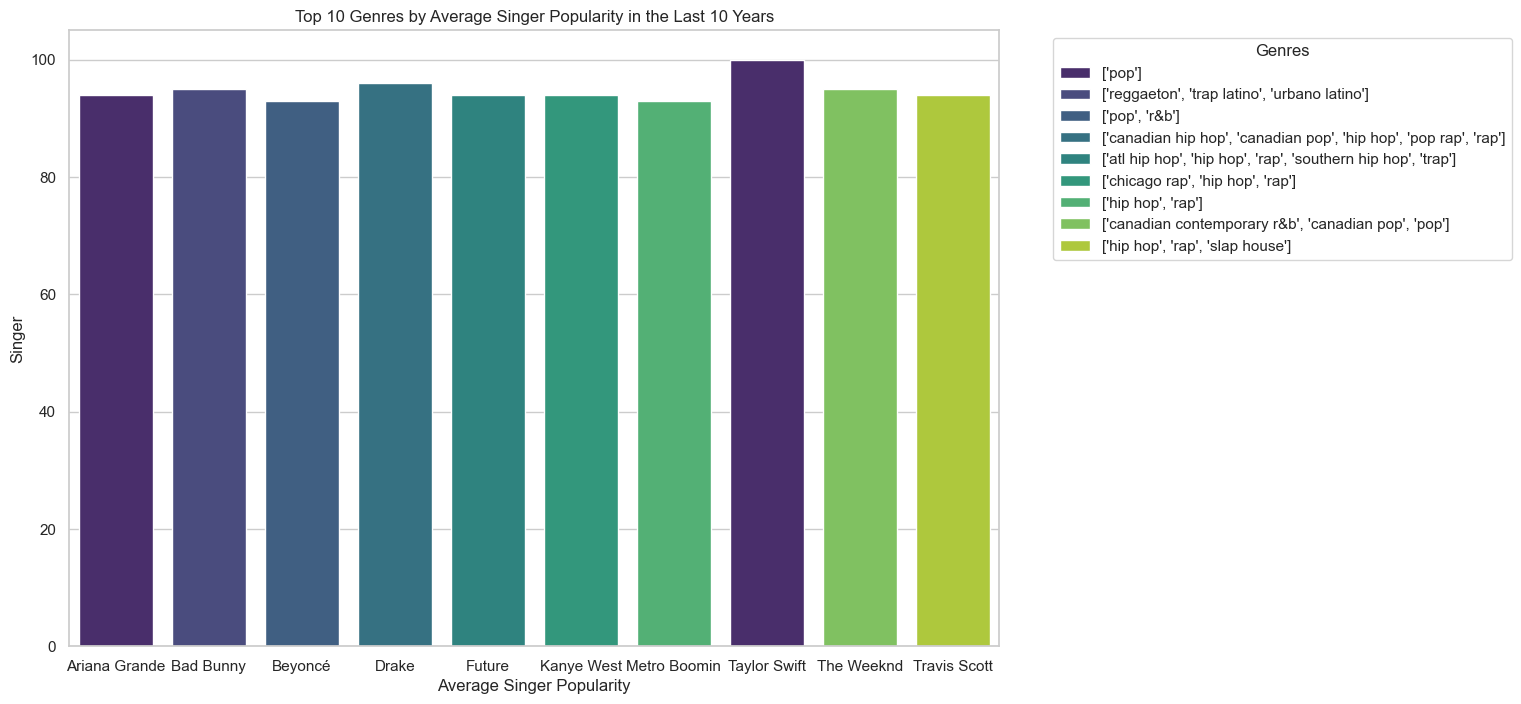

In [35]:
# Configurar o estilo do seaborn
sns.set(style="whitegrid")

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='artist_name', y='artist_popularity', hue='artist_genres', data=filtered_data, palette='viridis')

# Adicionar títulos e rótulos
plt.title('Top 10 Genres by Average Singer Popularity in the Last 10 Years')
plt.xlabel('Average Singer Popularity')
plt.ylabel('Singer')

# Exibir a legenda
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Exibir o gráfico
plt.show()

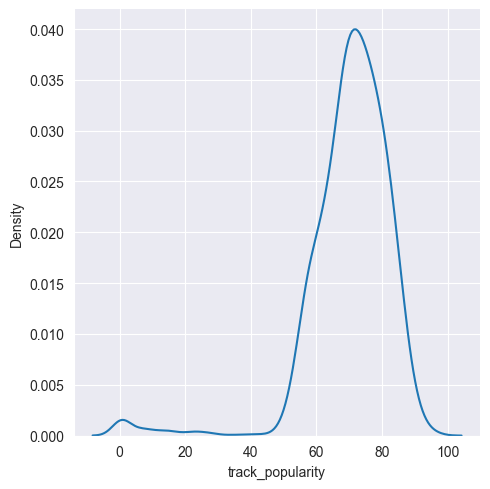

In [13]:
## A distribuição de popularidade
sns.displot(data=df, x='track_popularity', kind='kde')

## Analise somente da popularidade da música em relação ao genero e ao artista. 

- Será analisado as músicas que mais fazerm sucesso, nessas playslist, o artista e o genero que mais faz sucesso. 
- Feito da mesma forma anterior, para mostrar quais são os generos mais populares, com base nas músicas mais ouvidas nos ultimos 10 anos. 

In [56]:
# Filtrar dados dos últimos 10 anos
recent_data = df[df['year'] >= df['year'].max() - 10]
recent_data = recent_data[['artist_genres', 'track_popularity', 'artist_name', 'track_name']]
# Verificar se existem valores nulos
recent_data = recent_data.dropna(subset=['artist_genres', 'track_popularity', 'artist_name', 'track_name'])
# Converter 'track_popularity' para numérico

#recent_data['track_popularity'] = pd.to_numeric(recent_data['track_popularity'], errors='coerce')

# Agrupar por 'artist_genres' e 'artist_name' e calcular a média da popularidade das faixas
genre_artist_group = recent_data.groupby(['artist_genres', 'artist_name', 'track_name'], as_index=False)['track_popularity'].mean()

# Obter os top 10 gêneros com maior popularidade média
top_genres = genre_artist_group.groupby('artist_genres')['track_popularity'].mean().sort_values(ascending=False).head(10).index

# Filtrar os dados para incluir apenas os top 10 gêneros
filtered_data = genre_artist_group[genre_artist_group['artist_genres'].isin(top_genres)]
# Ordenar os dados pelo track_popularity em ordem decrescente
filtered_data = filtered_data.sort_values(by='track_popularity', ascending=False)
# Exibir o grupo filtrado
print(filtered_data)




                                         artist_genres        artist_name  \
159                   ['brooklyn indie', 'pov: indie']             Mitski   
524  ['garage rock', 'modern rock', 'permanent wave...     Arctic Monkeys   
269                       ['classic oklahoma country']         Zach Bryan   
527  ['gen z singer-songwriter', 'singer-songwriter...      David Kushner   
268                                      ['chill pop']          Tom Odell   
651                     ['lgbtq+ hip hop', 'neo soul']        Frank Ocean   
691  ['modern alternative rock', 'modern rock', 'pop']  The Neighbourhood   
112               ['bedroom pop', 'pop', 'pov: indie']         Conan Gray   
523  ['garage rock', 'modern rock', 'permanent wave...     Arctic Monkeys   
525  ['garage rock', 'modern rock', 'permanent wave...     Arctic Monkeys   
993    ['rap canario', 'trap latino', 'urbano latino']            Quevedo   
16                      ['alt z', 'pop', 'pov: indie']      Alec Benjamin   

## O gráfico resultante deve mostrar:

-Os 10 gêneros musicais mais populares nos últimos 10 anos.
-A média de popularidade das músicas para esses gêneros.
-Os nomes dos artistas associados a esses gêneros.

In [48]:
import plotly.express as px

# Criar o gráfico de barras interativo
fig = px.bar(
    filtered_data,
    x='artist_name',
    y='track_popularity',
    color='artist_genres',
    hover_data=['track_name'],
    labels={
        'track_popularity': 'Average Track Popularity',
        'artist_name': 'Artists',
        'artist_genres': 'Genres',
        'track_name': 'Tracks'
    },
    title='Top 10 Genres by Average Track Popularity in the Last 10 Years',
    color_continuous_scale='viridis'  # Define a paleta de cores para 'viridis'
)

# Atualizar o layout para ajustar a legenda
fig.update_layout(
    legend_title_text='Genres',
    legend=dict(
        title='Genres',
        x=1.05,
        y=1,
        traceorder='normal'
    ),
    xaxis_title='Artists',
    yaxis_title='Average Track Popularity',
    hovermode='closest'
)

# Exibir o gráfico
fig.show()


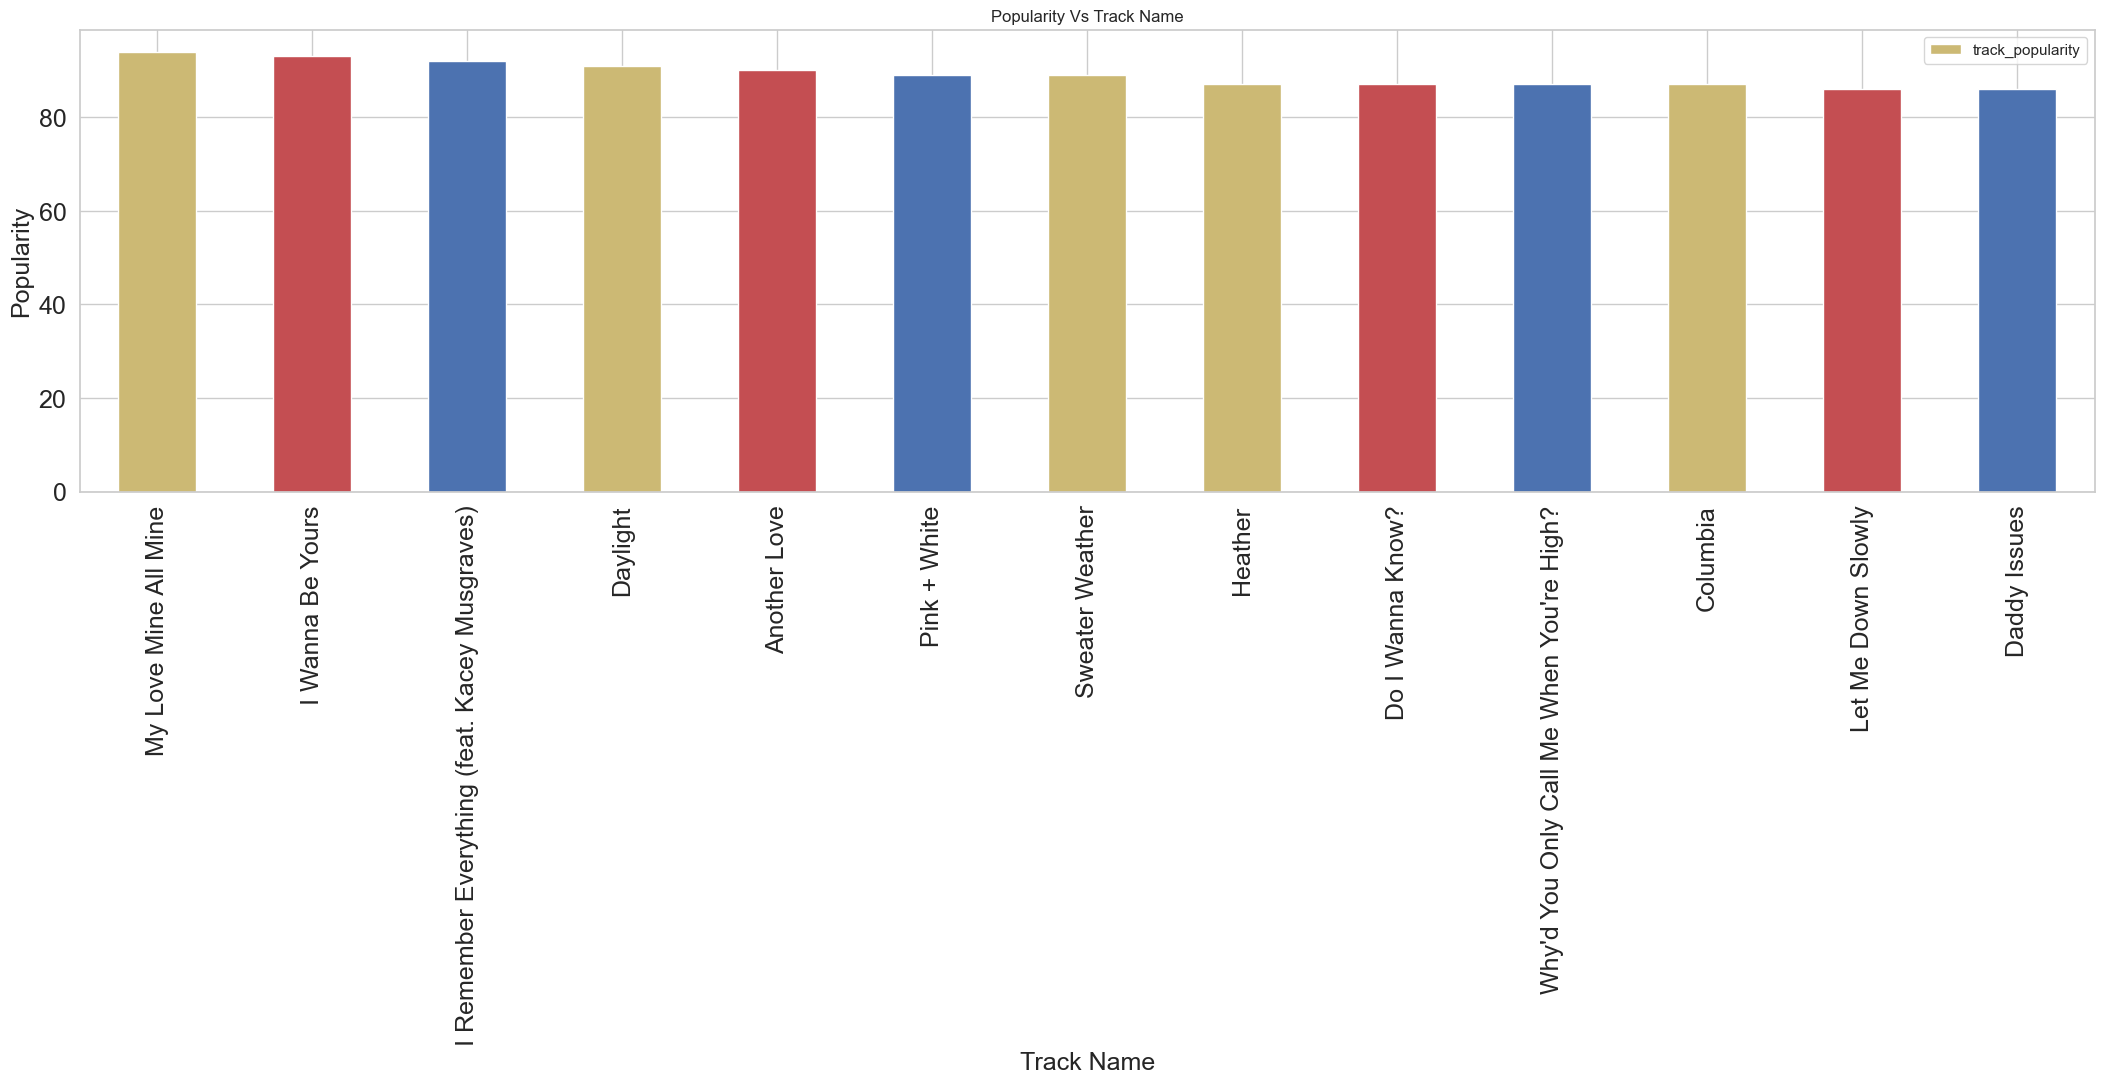

In [51]:
filtered_data.plot(y='track_popularity',x= 'track_name',kind='bar',figsize=(26,6),legend =True,title="Popularity Vs Track Name",
        fontsize=18,stacked=True,color=['y', 'r', 'b','y', 'r', 'b', 'y'])
plt.ylabel('Popularity', fontsize=18)
plt.xlabel('Track Name', fontsize=18)
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_13420\2588005850.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Relationship between Genre & Popularity')

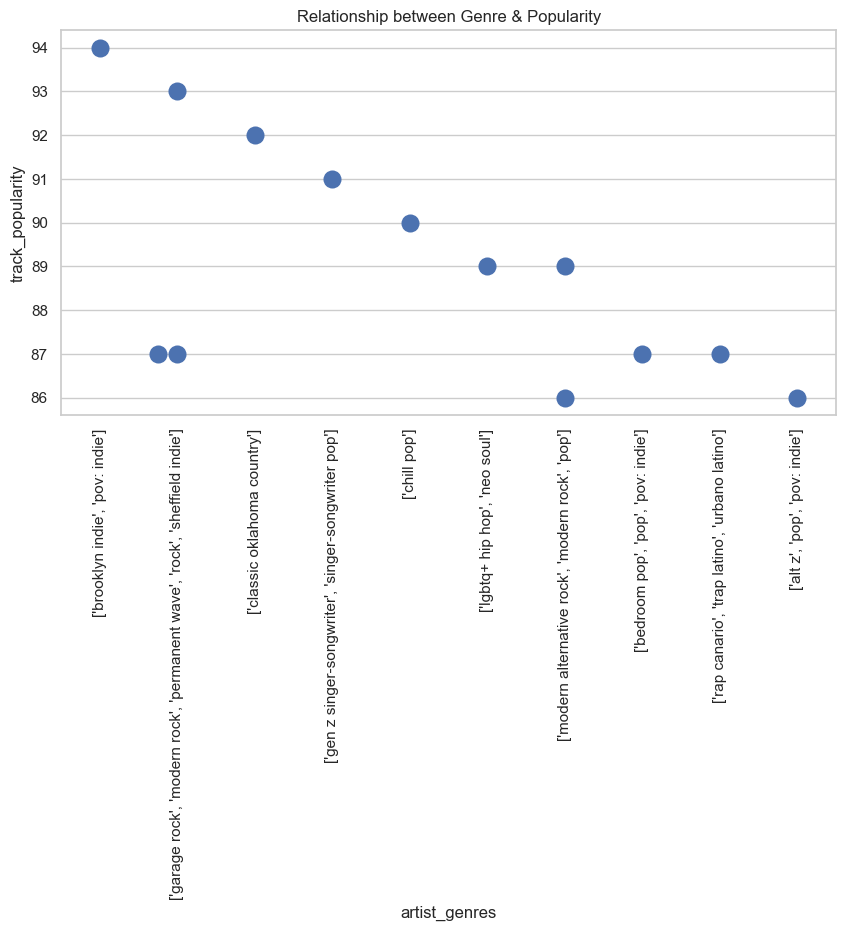

In [58]:
plt.figure(figsize=(10,5))
swarmplot=sns.swarmplot(x="artist_genres",y="track_popularity",data=filtered_data, s=13)
swarmplot.set_xticklabels(swarmplot.get_xticklabels(),rotation=90)
swarmplot.set_title("Relationship between Genre & Popularity")

In [ ]:
### Podemos ver anteriormente que a relação de popularidade do artista, para a frquencia nas playslist analisadas, pode não impactar muito ao longo prazo 
## Vamos seguir para a próxima analise, tento em vista os artistas que estão mais em alta nos dados de 2023

In [60]:
newDf = df['artist_name'].value_counts().head(30)

artist_name
Taylor Swift         34
Drake                34
Rihanna              29
Ariana Grande        22
Beyoncé              22
The Weeknd           21
Eminem               21
Ed Sheeran           20
Calvin Harris        20
P!nk                 19
Justin Bieber        19
Kanye West           19
Coldplay             18
Chris Brown          18
Britney Spears       18
Billie Eilish        16
Adele                16
Katy Perry           15
Black Eyed Peas      15
Post Malone          15
Bruno Mars           15
Maroon 5             14
USHER                14
Bad Bunny            14
Jason Derulo         14
Justin Timberlake    13
Miley Cyrus          13
Shawn Mendes         13
Kendrick Lamar       12
David Guetta         12
Name: count, dtype: int64

## Analisando cada categoria

Verificar a relação do artista, albúm, música e a popularidade da música dos útimos anos. 



In [61]:
## Visualizar a popularidade das músicas mais populares.
import plotly.express as px
top_tracks = df.sort_values(by='track_popularity', ascending=False).head(30)

fig = px.bar(top_tracks, x='track_name', y='track_popularity' ,
             title='Top 10 Músicas Mais Populares',
             labels={'track_name': 'Track Name', 'track_popularity': 'Popularity'},
             color='artist_name', hover_data=['album', 'year'])
fig.show()

## Agora podemos analisar um pouco mais sobre as caracteristicas das músicas que fazem mais sucesso hoje(2023) e nos últimos 10 anos. 
-- Vamos começar olhando a realação da valencia, sendo a  medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, alegres, feliz, eufóricas), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, irritado).


In [51]:
fig = px.box(df, x='year', y='valence', color='year',
             title='Distribuição de Valence por Ano',
             labels={'year': 'Year', 'valence': 'Valence'},
             points='all')
fig.show()


In [24]:
import plotly.express as px
data = df.dropna(subset=['track_popularity', 'artist_popularity', 'energy', 'danceability', 'energy', 'key',])

fig = px.scatter(data,  x='artist_popularity', y='track_popularity', size='energy',color='danceability',
                 title='Relação entre Popularidade da música e Popularidade do artista ',
                 labels={'artist_popularity': 'Popularidade do artista', 'track_popularity': 'Popularidade da música'},
                 hover_data=['album', 'artist_name'])

# Mostrar o gráfico
fig.show()


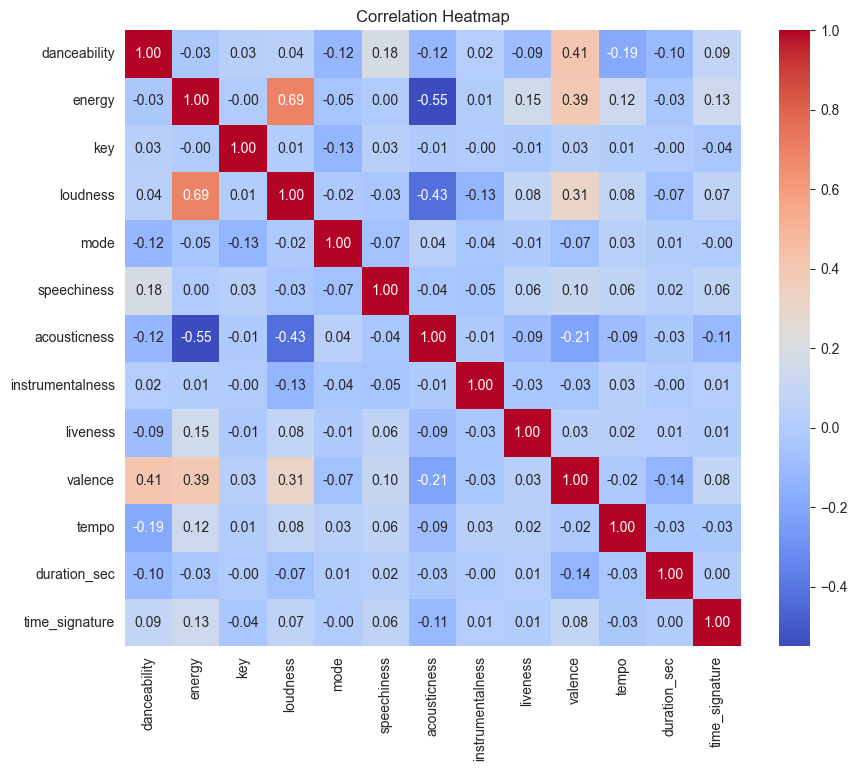

In [64]:
columns_to_correlate = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_sec', 'time_signature']

correlation_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

plt.title("Correlation Heatmap")
plt.show()

## Transformação dos dados para inserir na IA
-- Vamos juntar os dados que podemos inserir ao nosso modelo para teste e para analise. 


In [63]:
df.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'duration_sec'],
      dtype='object')

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2400.0,2011.500000,6.923629,2000.000000,2005.750000,2011.5000,2017.250000,2023.000
track_popularity,2400.0,70.277083,12.958245,0.000000,65.000000,72.0000,78.000000,96.000
artist_popularity,2400.0,75.882500,12.016746,36.000000,68.000000,77.0000,85.000000,100.000
danceability,2400.0,0.661767,0.140335,0.162000,0.573750,0.6730,0.760000,0.975
energy,2400.0,0.688705,0.165345,0.051900,0.585000,0.7060,0.814000,0.999
key,2400.0,5.238333,3.596909,0.000000,2.000000,5.0000,8.000000,11.000
loudness,2400.0,-5.811735,2.086712,-21.107000,-6.846000,-5.5265,-4.381750,-0.276
mode,2400.0,0.589167,0.492088,0.000000,0.000000,1.0000,1.000000,1.000
speechiness,2400.0,0.097995,0.093276,0.022500,0.037900,0.0568,0.115000,0.576
acousticness,2400.0,0.164838,0.210630,0.000013,0.018075,0.0736,0.233000,0.978


In [69]:
from sklearn.feature_extraction.text import CountVectorizer

main_label = 'track_popularity'

# convert columns to to str
for col in ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']:
    df[col] = df[col].apply(lambda x: str(round(1/10*round(10*x),1)) )

    
# vectorize columns
def vectorize_column(df, col_name, min_df=20):

    try:
        df[col_name] = df[col_name].apply(ast.literal_eval)
        df[col_name] = df[col_name].apply(lambda x: ', '.join(list(set(x))))
    except:
        pass
    ll = df[col_name].fillna('none').str.split(', ').to_list()
    ll = [[j.rstrip(', ').strip(' ').replace('/', '_').replace('.', '_').replace('+', '_').replace(',', '_').replace('\'', '_').replace(' ', '_').replace('.', '_').replace('&', '_').replace('-', '_').replace('!', '_') for j in i] for i in ll]
    ll1 = []
    for item in ll:
        if item != ['none']:
            ttt = ' '.join(item)
        else:
            ttt = 'none'
        ll1.append(ttt)
    vectorizer = CountVectorizer(max_features=60, min_df=min_df, lowercase=False)
    vectorizer.fit(ll1)
    voc = vectorizer.vocabulary_
    voc_inv = {v: col_name+'_'+k for k, v in voc.items()}
    vector = vectorizer.transform(ll1)
    tt = pd.DataFrame(vector.toarray())
    tt = tt.rename(columns=voc_inv)
    df = pd.concat([df.reset_index(drop=True),tt.reset_index(drop=True)], axis=1).drop([col_name], axis=1)
    return df
for col in ['artist_genres']:
    df = vectorize_column(df, col_name=col, min_df=10)
    
# bin numerical cols in equal qcuts
def bin_column(df, col_name, num_bins=7):

    # Calculate the bin edges to evenly split the numerical column
    bin_edges = pd.qcut(df[col_name], q=num_bins, retbins=True)[1]

    # Define labels for the categorical bins based on bin edges
    bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(num_bins)]

    # Use pd.qcut to create quantile-based bins with equal number of records in each bin
    df[col_name] = pd.qcut(df[col_name], q=num_bins, labels=False)

    # Update the bin labels to be more descriptive
    df[col_name] = df[col_name].map(lambda x: bin_labels[x])
    
    # Convert the column to object dtype
    df[col_name] = df[col_name].astype('object')

    return df



for col in df.columns:
    if col != main_label and not col.startswith('artist_genres'):
        try:
            df = bin_column(df, col)
            print(f"Binned column {col}")
        except:
            df[col] = df[col].fillna('None').astype(str)
            encoder = RareLabelEncoder(n_categories=1, max_n_categories=70, replace_with='Other', tol=8/df.shape[0])
            df[col] = encoder.fit_transform(df[[col]])
            print(f"LabelEncoded column {col}")
 

print(df.shape)
df.sample(5).T

Binned column year
LabelEncoded column track_name
LabelEncoded column album
LabelEncoded column artist_name
Binned column artist_popularity
LabelEncoded column danceability
LabelEncoded column energy
Binned column key
LabelEncoded column loudness
LabelEncoded column mode
LabelEncoded column speechiness
LabelEncoded column acousticness
LabelEncoded column instrumentalness
LabelEncoded column liveness
LabelEncoded column valence
Binned column tempo
LabelEncoded column time_signature
Binned column duration_sec
(2400, 79)


,452,1688,1029,1911,323
year,2003-2006,2013-2017,2006-2010,2017-2020,2000-2003
track_name,Other,Other,Other,Other,Other
track_popularity,67,68,72,84,74
album,Other,Other,Other,Other,Other
artist_name,Other,Other,Other,Travis Scott,Other
...,...,...,...,...,...
artist_genres__uk_dance_,0,0,0,0,0
artist_genres__uk_pop_,0,0,0,0,0
artist_genres__urban_contemporary_,0,0,1,0,0
artist_genres__urbano_latino_,0,0,0,0,0


In [70]:
df['artist_name'].value_counts()

artist_name
Other                 1515
Taylor Swift            34
Drake                   34
Rihanna                 29
Beyoncé                 22
                      ... 
Lil Wayne                8
DJ Snake                 8
Demi Lovato              8
Akon                     8
The Pussycat Dolls       8
Name: count, Length: 67, dtype: int64

In [76]:
# initialize data
y = df[main_label].values.reshape(-1,)
X = df.drop([main_label], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols_idx = [list(X.columns).index(c) for c in cat_cols]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=df[['artist_name']])
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 78), (1200, 78), (1200,), (1200,))

In [81]:
# initialize Pool
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_cols_idx)
test_pool = Pool(X_test,
                 y_test,
                 cat_features=cat_cols_idx)
# specify the training parameters 
model = CatBoostRegressor(iterations=170, 
                          depth=5,
                          verbose=0,
                          learning_rate=0.05, 
                          loss_function='RMSE')
#train the model
model.fit(train_pool)
# make the prediction using the resulting model
y_train_pred = model.predict(train_pool)
y_test_pred = model.predict(test_pool)

rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train,3)} points, and for test {round(rmse_test,3)} points")

TypeError: BaseContext.Pool() got an unexpected keyword argument 'cat_features'

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Inicializar os dados
y = df[main_label].values
X = df.drop([main_label], axis=1)

# Identificar colunas categóricas
cat_cols = X.select_dtypes(include=['object']).columns

# Converter variáveis categóricas para variáveis dummy
X = pd.get_dummies(X, columns=cat_cols)

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=df[['artist_name']])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Inicializar o modelo RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões usando o modelo treinado
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular RMSE para treinamento e teste
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)
print(f"RMSE score for train {round(rmse_train,3)} points, and for test {round(rmse_test,3)} points")

# Pontuações baseline (assumindo a mesma previsão para todas as amostras de dados)
rmse_bs_train = mean_squared_error(y_train, [np.mean(y_train)] * len(y_train), squared=False)
rmse_bs_test = mean_squared_error(y_test, [np.mean(y_train)] * len(y_test), squared=False)
print(f"RMSE baseline score for train {round(rmse_bs_train,3)} points, and for test {round(rmse_bs_test,3)} points")



(1200, 305) (1200, 305) (1200,) (1200,)
RMSE score for train 9.665 points, and for test 11.726 points
RMSE baseline score for train 13.579 points, and for test 12.301 points


C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

C:\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px



# Selecionar as variáveis de interesse para clusterização
features = [
    'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 
    'tempo', 'duration_sec', 'artist_popularity'
]

# Remover valores nulos
data = df.dropna(subset=features)

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Aplicar a técnica do cotovelo para determinar o número ideal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)


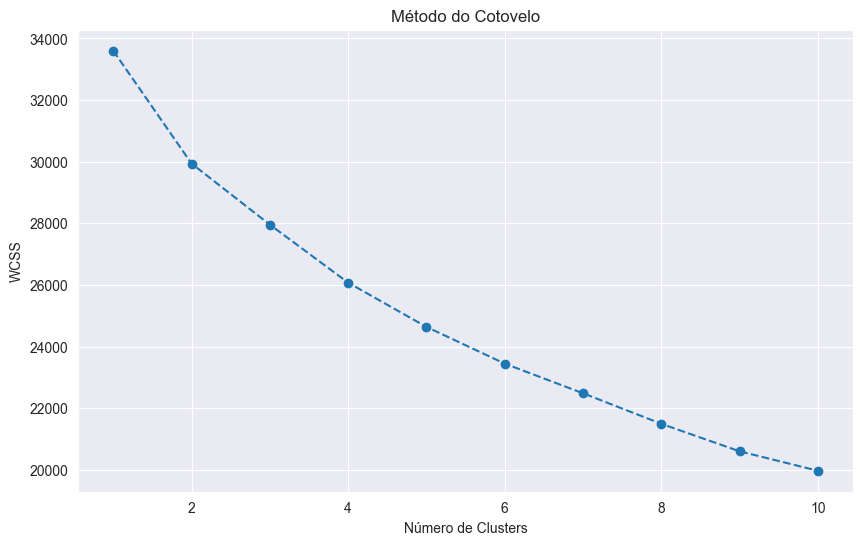

In [35]:
# Plotar o gráfico do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
# Aplicar o K-means com o número ideal de clusters (No caso foi o 2)
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

# Visualizar os clusters
fig = px.scatter(data, x='danceability', y='energy', color= data['cluster'], 
                 title='Clusterização de Músicas',
                 labels={'danceability': 'Danceability', 'energy': 'Energy'},
                 hover_data=['year', 'artist_name', 'album'],
                 color_continuous_scale=px.colors.qualitative.G10)

fig.show()

# Analisar as características médias de cada cluster
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
print(cluster_centers)

   track_popularity  danceability    energy       key  loudness      mode  \
0         72.251758      0.623120  0.509764  4.890295 -7.774356  0.670886   
1         69.445826      0.678037  0.764032  5.384843 -4.985551  0.554766   

   speechiness  acousticness  instrumentalness  liveness   valence  \
0     0.087801      0.337933          0.016280  0.154348  0.353840   
1     0.102286      0.091973          0.012248  0.183663  0.612715   

        tempo  duration_sec  artist_popularity  
0  116.673326    228.490598          78.770745  
1  122.048867    223.098038          74.666667  
